## 1 Polynôme interpolateur de Lagrange

### Exercice 1 (Implémentation Python) : Phénomène de Runge

Nous allons mettre en évidence le phénomène de Runge sur la fonction 
$$f(x):x\in[a,b]=[-1,1]\mapsto \frac{1}{4x^2+1}.$$ 
C'est-à-dire le fait que la suite de polynômes d'interpolation de Lagrange $(P_n)_n$ ne converge pas uniformément vers $f$ sur $[a,b]$ lorsque les points $x_1^{(n)},...,x_n^{(n)}$ sont uniformément répartis dans $[a,b]$.


**Question 1** : Tracer dans une fenêtre Python le graphe de $f$ sur $[-1,1]$.



**Correction**:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 1./(4.*(x**2)+1.)
x=np.linspace(-1., 1., 1001)
plt.xlabel('x')
plt.ylabel('f')
plt.plot(x, f(x), 'r') 

**Question 2** : Le polynôme d'interpolation de Lagrange peut se calculer de la manière suivante :  

>```
import scipy.interpolate as inter  
y=inter.barycentric_interpolate(xi,yi,x)
```

où ```xi``` et ```yi``` représentent les points d'interpolation $(x_i,y_i)$ par lesquels le graphe du polynôme doit passer et ```x``` les points en lesquels on veut connaître la valeur du polynôme d'interpolation.
En prenant pour ```xi```, 11 points régulièrement espacés dans $[-1, 1]$ et pour ```yi``` les images $f(x_i)$, tracer dans une fenêtre Python le polynôme d'interpolation de Lagrange en bleu.

**Question 3** : Vérifier par des marqueurs aux points $(x_i,y_i)$ que le graphe de ce polynôme passe bien par ces points d'interpolation.

**Correction**:

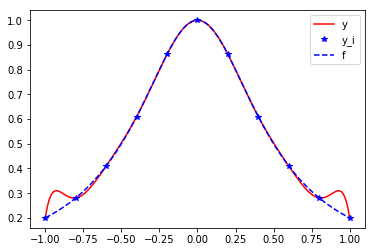

In [2]:
import scipy.interpolate as inter
xi=np.linspace(-1.,1.,11)
yi=np.zeros(np.shape(xi))
for i in range(np.size(xi)):
    yi[i]=f(xi[i])

x=np.linspace(-1.,1.,10001)
y=inter.barycentric_interpolate(xi, yi, x)

plt.plot(x, y, 'r',label='y')
plt.plot(xi, yi, 'b*',label='y_i')
plt.plot(x, f(x), 'b--',label='f')
plt.legend(loc='upper right')

**Question 4** : Sans rien changer d'autre à votre code, augmenter le nombre de points ```xi``` à 101 points régulièrement espacés dans $[-1, 1]$  
(et calculer les ```yi``` correspondant).


**Correction**:

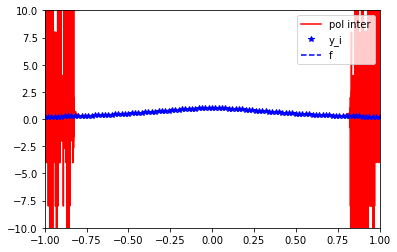

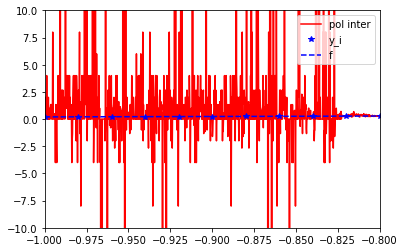

In [3]:
xi=np.linspace(-1.,1.,101)
yi=np.zeros(np.shape(xi))
for i in range(np.size(xi)):
    yi[i]=f(xi[i])

x=np.linspace(-1.,1.,10001)
y=inter.barycentric_interpolate(xi, yi, x)
plt.plot(x, y, 'r',label='pol inter')
plt.plot(xi, yi, 'b*',label='y_i')
plt.plot(x, f(x), 'b--',label='f')
plt.legend(loc='upper right')
plt.axis([-1, 1, -10, 10])
plt.show()


plt.plot(x, y, 'r',label='pol inter')
plt.plot(xi, yi, 'b*',label='y_i')
plt.plot(x, f(x), 'b--',label='f')
plt.legend(loc='upper right')
plt.axis([-1, -0.8, -10, 10])
plt.show()

**Question 5** : Qu'observez-vous ? Le graphe du polynôme d'interpolation passe-t-il toujours par les couples de points $(x_i, y_i)$ ? Le polynôme approche-t-il uniformément $f$ sur $[-1,1]$?


**Correction**:

In [4]:
sum(abs(y-f(x)))/1001.0

2747734.955081544

Le polynôme d'interpolation de Lagrange continue de vérifier la contrainte de passer par les couples de points $(x_i,y_i)$. Par contre, le polynôme d'interpolation oscille très fortement en dehors de ces points d'interpolation. Le polynôme n'approche pas uniformément $f$ sur $[-1,1]$ : c'est le phénomène de Runge.

### Exercice 2 (Implémentation Python) : Points d'interpolation de Tchebychev

Nous allons dans cet exercice montrer que le phénomène de Runge ne se produit plus si les points d'interpolation sont pris de manière particulière (et non uniformément répartis dans $[a,b]$). En effet, si $x_j^{(n)}=\cos(\frac{(2j+1)\pi}{2n+2})$ pour $j\in\{0,..,n\}$ et si $f$ est lipschitzienne alors le polynôme d'interpolation de Lagrange approche uniformément $f$ sur $[a,b]$.

**Question 1:** En reprenant votre code de l'exercice 1 sur le *phénomène de Runge*, modifier les points d'interpolation ```xi``` en ```xi``` $=x_j^{(n)}=\cos(\frac{(2j+1)\pi}{2n+2})$ pour $j\in\{0,..,n\}$ et pour $n=100$.

**Correction**:

In [5]:
n=100
xi=np.zeros(n+1)
for i in range(0, n+1,1): 
    xi[i]=np.cos(((2.*i+1.)*np.pi)/(2.*n+2.))
yi=np.zeros(np.shape(xi))
for i in range(np.size(xi)):
    yi[i]=f(xi[i])

x=np.linspace(-1.,1.,10001)
y=inter.barycentric_interpolate(xi, yi, x)

**Question 2:**  Tracer le polynôme d'interpolation de Lagrange avec ces nouveaux points d'interpolation.


**Correction**:

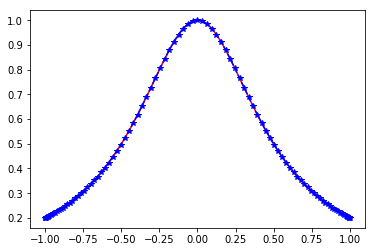

In [6]:
plt.plot(x, y, 'r')
plt.plot(xi, yi, 'b*')
plt.plot(x, f(x), 'b--')
plt.show()


**Question 3:**  Qu'observez-vous ? Y a-t-il encore le phénomène de Runge ?

**Correction**: On observe que le polynôme d'interpolation approche très bien la fonction et le phénôme de Runge a disparu : il n'y a plus d'oscillation.

In [7]:
sum(abs(y-f(x)))/1001.0

1.2711277252220543e-15

### Exercice 3 (Implémentation Python) : Interpolation et dichotomie

Le tableau suivant recense la population de la France entre les années 1970 et 2010 :

| Année  | Population en France |
| ------------- | ------------- |
| 1970  | $5.053\times10^7$  |
| 1980  | $5.373 \times 10^7$  |
| 1990  | $5.658\times 10^7$  |
| 2000  | $5.886 \times 10^7$  |
| 2010  | $6.279 \times 10^7$  |

Nous allons étudier l'évolution de la population. On peut considérer les données comme une suite de $5$ couples de points, et pour simplifier, on omet le facteur commun $10^7$ dans le calcul.

**Question 1:** Afficher dans la fenêtre $[x_{\min},x_{\max}]=[1965, 2015]$ et $[y_{\min},y_{\max}]=[4.5,6.5]$ les couples de points $(x_i, y_i)$ en les indiquant par un marqueur $\times$ bleu.

**Correction**:

[1965, 2015, 4.5, 6.5]

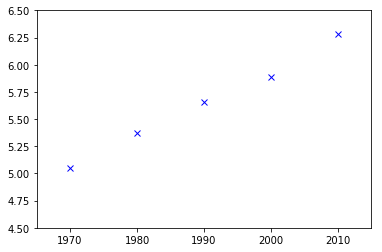

In [8]:
xi=np.array([1970., 1980., 1990., 2000., 2010.])
yi=np.array([5.053, 5.373, 5.658, 5.886, 6.279])

plt.plot(xi,yi,'bx')
plt.axis([1965, 2015, 4.5, 6.5])

**Question 2:** Le but de cette question est d'implémenter le polynôme d'interpolation de Lagrange, sans passer par la fonction python ```inter.barycentric_interpolate```. 
Ecrire une fonction python pour chaque polynôme interpolateur élémentaire (sans les développer) ainsi qu'une fonction python pour le polynôme interpolateur de Lagrange. 
Le tracer sur la figure et vérifier que le graphe de ce polynôme passe par les couples de points connus.	


**Correction:**

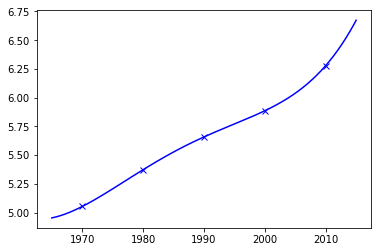

In [9]:
def L1(X):
    return (X-1980.)*(X-1990.)*(X-2000.)*(X-2010.)/((1970.-1980.)*(1970.-1990.)*(1970.-2000.)*(1970.-2010.))
def L2(X):
    return (X-1970.)*(X-1990.)*(X-2000.)*(X-2010.)/((1980.-1970.)*(1980.-1990.)*(1980.-2000.)*(1980.-2010.))
def L3(X):
    return (X-1970.)*(X-1980.)*(X-2000.)*(X-2010.)/((1990.-1970.)*(1990.-1980.)*(1990.-2000.)*(1990.-2010.))
def L4(X):
    return (X-1970.)*(X-1980.)*(X-1990.)*(X-2010.)/((2000.-1970.)*(2000.-1980.)*(2000.-1990.)*(2000.-2010.))
def L5(X):
    return (X-1970.)*(X-1980.)*(X-1990.)*(X-2000.)/((2010.-1970.)*(2010.-1980.)*(2010.-1990.)*(2010.-2000.))
def P(X):
    return 5.053*L1(X)+5.373*L2(X)+5.658*L3(X)+5.886*L4(X)+6.279*L5(X)
X=np.linspace(1965, 2015, 100001)
plt.plot(X, P(X), 'b')
plt.plot(xi,yi,'bx')

**Question 3:** On note $P(x)=\sum_{k=0}^{4}a_kx^k$ le polynôme interpolateur de Lagrange. Expliquer pourquoi le système de Vandermonde suivant fournit les coefficients du polynôme $P$
 \begin{equation}
 \begin{pmatrix}
1 & x_1 & {x_1}^2 & \dots & {x_1}^{5-1}\\
1 & x_2 & {x_2}^2 & \dots & {x_2}^{5-1}\\
\vdots & \vdots & \vdots & &\vdots \\
1 & x_5 & {x_5}^2 & \dots & {x_5}^{5-1}\\
\end{pmatrix} 
\begin{pmatrix} a_0 \\ a_1\\ \vdots \\a_4 \end{pmatrix}
=
\begin{pmatrix} y_1 \\ y_2\\ \vdots \\y_5  \end{pmatrix}
\end{equation}
Résoudre numériquement ce système. On utilisera au choix une méthode numérique vue précédemment dans le cours mais on évitera d'utiliser la fonction python *np.linalg.solve*. Tracer sur la figure les polynômes trouvés aux questions 2 et 3 et vérifier qu'ils sont bien identiques. 

**Correction:**

('coeff du polynome PIL calcules avec systeme de Vandermonde=', array([ 1.58108486e+07, -3.18482014e+04,  2.40567233e+01, -8.07600000e-03,
        1.01666667e-06]))


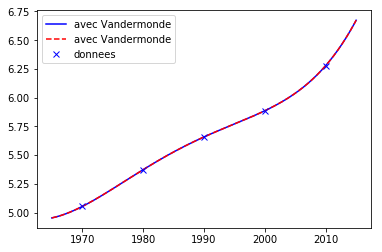

In [10]:
N=5
A=np.zeros((N, N))
for i in range(0, N, 1):
    for j in range(0,N,1):
        A[i,j]=xi[i]**j
Coef=np.linalg.solve(A,yi)    # on aurait pu utiliser les méthodes itératives (Jacobi, Gauss-Seidel, SOR) ou la méthode directe LU
print("coeff du polynome PIL calcules avec systeme de Vandermonde=", Coef)

def P_vandermonde(x):
    return Coef[0]+Coef[1]*x+Coef[2]*x**2+Coef[3]*x**3+Coef[4]*x**4
plt.plot(X, P(X), 'b',label='avec Vandermonde')
plt.plot(X, P_vandermonde(X), 'r--',label='avec Vandermonde')
plt.plot(xi,yi,'bx',label='donnees')
plt.legend(loc='upper left')

**Question 4:** En vous servant de la figure précédente, la population de la France est-elle déjà supérieure à $6 \times 10^7$ en 2005 ? Justifier votre réponse.

**Correction**

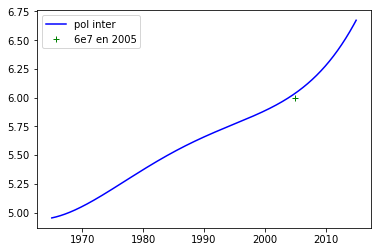

In [11]:
plt.plot(X, P(X), 'b',label='pol inter')
plt.plot(2005, 6, '+g',label='6e7 en 2005')
plt.legend(loc='upper left')

**Question 5:** Déterminer par la méthode de dichotomie au mois près, l'année où la population a atteint $6 \times 10^7$. Représenter ce point sur la figure avec un marqueur $*$ vert.

**Correction**

('le zero du PIL par la methode de dichotomie=', 2003.974609375)


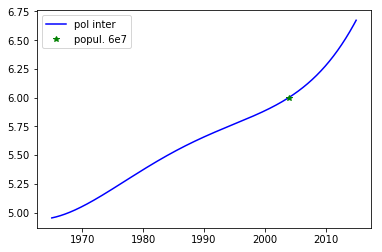

In [12]:
def f(x):
    return P(x)-6.
def dichotomie(f, a,b,eps):
    if f(a)*f(b)>=0:
        return 'erreur condition non respectee'
    else:
        milieu=np.zeros(1)
        milieu[0]=(b+a)/2.
        while np.abs(b-a)>=eps:
            c=(a+b)/2.
            if f(a)*f(c)<0:
                b=c
            else:
                a=c
            milieu=np.append(milieu,[c])
        return milieu
eps=10.**(-1)
result=dichotomie(f, 1970., 2005., eps)
print('le zero du PIL par la methode de dichotomie=', result[-1])
plt.plot(X, P(X), 'b',label='pol inter')
plt.plot(2004, 6, '*g',label='popul. 6e7')
plt.legend(loc='upper left')


La population a atteint  $6 \times 10^7$ habitants en 2004.

## Exercice 4 :  Polynômes de Tchebychev de première et deuxième espèces

**Question 1** Soit $n\in\mathbb{N}$, montrer qu'il existe un unique polynôme $T_n$ tel que :
$$\forall \theta\in\mathbb{R}, \ \ T_n(\cos(\theta))=\cos(n\theta).$$
On appelle ce polynôme, le polynôme de Tchebychev de première espèce.


**Correction**:

**Existence:** On a pour tout $n\in\mathbb{N}$ et $\theta\in\mathbb{R}$
$$\begin{array}{rcl}
\cos(n\theta)&=&\mbox{Re}\left(e^{in\theta}\right)=\mbox{Re}\left((\cos\theta+i\sin\theta)^n\right)\\
&=&\mbox{Re}\left(\sum\limits_{k=0}^n\begin{pmatrix}n\\k\end{pmatrix}(\cos\theta)^{n-k}(i\sin\theta)^k\right)
\end{array}$$

La dernière égalité étant obtenue avec le binôme de Newton. Seuls les $k$ pairs sont à considérer dans la somme à cause de la partie réelle. Nous avons donc
$$\begin{array}{rcl}
\cos(n\theta)&=&\sum\limits_{p=0}^{\left\lfloor\dfrac{n}{2}\right\rfloor}\begin{pmatrix}n\\2p\end{pmatrix}(\cos\theta)^{n-2p}(-1)^p(\sin\theta)^{2p}\\
&=&\sum\limits_{p=0}^{\left\lfloor\dfrac{n}{2}\right\rfloor}\begin{pmatrix}n\\2p\end{pmatrix}(\cos\theta)^{n-2p}(-1)^p(1-\cos^2\theta)^{p}
\end{array}$$
Posons 
$$T_n(X)=\sum\limits_{p=0}^{\left\lfloor\dfrac{n}{2}\right\rfloor}\begin{pmatrix}n\\2p\end{pmatrix}X^{n-2p}(-1)^p(1-X^2)^{p}$$
$T_n$ est bien un polynôme qui vérifie  $T_n(\cos(\theta))=\cos(n\theta)$.  

**Unicité:** Si $Q$ et $T$ sont deux polynômes tels que $Q(\cos\theta)=T(\cos\theta)=\cos(n\theta)$, alors $Q-T$ est un polynôme qui s'annule en tous les $\cos\theta$ pour tous les $\theta\in\mathbb{R}$. Ce serait un polynôme qui a une infinité de racines, c'est donc le **polynôme nul**.

**Question 2** Calculer les premiers polynômes $T_0$, $T_1$, $T_2$.

**Correction**:

Pour tout $\theta\in[0,2\pi]$ et $x\in\mathbb{R}$, on a:  
$T_0(\cos \theta)=\cos(0)=1$, donc $T_0(x)=1$.  
$T_1(\cos \theta)=\cos(\theta)$, donc $T_1(x)=x$.   
$T_2(\cos \theta)=\cos(2\theta)=\cos^2\theta-\sin^2\theta=2\cos^2\theta-1$, donc $T_2(x)=2x^2-1$.

**Question 3** On considère la suite des polynômes $(T_n)_n$. Quelle est la relation de récurrence de cette suite ?


**Correction**:

Pour tout $a,b\in\mathbb{R}$,
$$\begin{array}{c}\cos(a+b)=\cos a\cos b -\sin a \sin b\\
\cos(a-b)=\cos a\cos b +\sin a \sin b\end{array}\Rightarrow
\cos(a+b)+\cos(a-b)=2\cos a \cos b$$
D'où pour tout  $\theta\in\mathbb{R}$,
$$\cos((n+2)\theta)+\cos(n\theta)=2\cos \theta \cos ((n+1)\theta)$$
On en déduit que
$$T_{n+2}(x)=2xT_{n+1}(x)-T_n(x).$$

**Question 4** Reprendre l'exercice avec les polynômes de Tchebychev de seconde espèce $U_n$ définis par :
$$\forall \theta\in\mathbb{R}, \ \ \sin(\theta)U_n(\cos(\theta))=\sin(n\theta).$$


**Correction**:

**Existence:** On a pour tout $n\in\mathbb{N}$ et $\theta\in\mathbb{R}$
$$\begin{array}{rcl}
\sin(n\theta)&=&\mbox{Im}\left(e^{in\theta}\right)=\mbox{Im}\left((\cos\theta+i\sin\theta)^n\right)\\
&=&\mbox{Im}\left(\sum\limits_{k=0}^n\begin{pmatrix}n\\k\end{pmatrix}(\cos\theta)^{n-k}(i\sin\theta)^k\right)\end{array}$$
A cause de la partie imaginaire, seuls les $k$ impairs sont à considérer dans la somme.
$$\begin{array}{rcl}
\sin(n\theta)&=&\sum\limits_{p=0}^{\left\lfloor\dfrac{n-1}{2}\right\rfloor}\begin{pmatrix}n\\2p+1\end{pmatrix}(\cos\theta)^{n-2p-1}(-1)^p(\sin\theta)^{2p+1}\\
&=&\sin(\theta)\sum\limits_{p=0}^{\left\lfloor\dfrac{n-1}{2}\right\rfloor}\begin{pmatrix}n\\2p+1\end{pmatrix}(\cos\theta)^{n-2p-1}(-1)^p(1-\cos^2\theta)^{p}
\end{array}$$
Posons 
$$U_n(X)=\sum\limits_{p=0}^{\left\lfloor\dfrac{n-1}{2}\right\rfloor}\begin{pmatrix}n\\2p+1\end{pmatrix}X^{n-2p-1}(-1)^p(1-X^2)^{p}$$
D'où $\sin(\theta)U_n(\cos(\theta))=\sin(n\theta)$ et $U_n$ est bien un polynôme.

**Unicité:** Si $U$ et $V$ sont deux polynômes tels que $\sin(\theta)U(\cos\theta)=\sin(\theta)V(\cos\theta)=\sin(n\theta)$, alors $U-V$ est un polynôme qui s'annule en tous les $\cos\theta$ pour $\theta\not\equiv0[\pi]$ (là où $sin(\theta)$ ne s'annule pas). Ce serait un polynôme qui a une infinité de racines, c'est donc le **polynôme nul**.  

**Premières valeurs:**  
Pour tout $\theta\in[0,2\pi]$ et $x\in\mathbb{R}$, on a:  
$\sin(\theta)U_0(\cos \theta)=\sin(0)=0$, donc $U_0(x)=0$.  
$\sin(\theta)U_1(\cos \theta)=\sin(\theta)$, donc $U_1(x)=1$.   
$\sin(\theta)U_2(\cos \theta)=\sin(2\theta)=2\sin\theta\cos\theta$, donc $U_2(x)=2x$.

**Relation de récurrence:**  
Pour tout $a,b\in\mathbb{R}$,
$$\begin{array}{c}\sin(a+b)=\sin a\cos b +\cos a \sin b\\
\sin(a-b)=\sin a\cos b -\cos a \sin b\end{array}\Rightarrow
\sin(a+b)+\sin(a-b)=2\sin a \cos b$$
D'où pour tout  $\theta\in\mathbb{R}$,
$$\sin((n+2)\theta)+\sin(n\theta)=2\cos \theta \sin ((n+1)\theta)$$
Donc
$$\sin(\theta)U_{n+2}(\cos(\theta))+\sin(\theta)U_{n}(\cos(\theta))=2\cos \theta\sin(\theta) U_{n+1}(\cos(\theta))$$

On en déduit que
$$U_{n+2}(x)=2xU_{n+1}(x)-U_n(x).$$

**Question 5** Que représentent les points de Tchebychev $x_j^{(n)}$ avec $j\in\{0,...,n\}$ définis à l'exercice 2 pour le polynôme $T_n$ ?


**Correction**:

On a
$$T_{n+1}\left(x_j^{(n)}\right)
=T_{n+1}\left(\cos\left(\dfrac{(2j+1)\pi}{2n+2}\right)\right)
=\cos\left((n+1)\dfrac{(2j+1)\pi}{2n+2}\right)
=\cos\left((2j+1)\dfrac{\pi}{2}\right)=0$$
Donc $x_j^{(n)}$ est racine de $T_{n+1}$.
$T_{n+1}$ étant de degré $n+1$ et les $n+1$ $x_j^{(n)}$ étant distincts, 
alors ce sont les seules racines de $T_{n+1}$.

## Splines cubiques naturelles

### Exercice 5 (Implémentation python) : Spline et polynôme interpolateur de Lagrange  
On souhaite calculer la spline cubique naturelle passant par les points $(x_i, y_i)$ pour $i\in\{0, ..., n\}$. Nous rappelons que la spline cubique est définie par une succession de polynômes de degré 3, notés $S_i$ sur chaque intervalle $[x_i, x_{i+1}]$ pour $i\in\{0, ..., n-1\},$ avec les contraintes suivantes:
$$
\forall i \in\{ 0,n-1\},  \left\{
\begin{array}{l}
S_i(x_i)=y_i,\\
S_i(x_{i+1})=y_{i+1},
\end{array}
\right.
\forall i \in\{1,n-2\},  \left\{
\begin{array}{l}
S'_{i-1}(x_i)=S'_{i}(x_i)\ \ \text{et}\ \ 
S'_i(x_{i+1})=S'_{i+1}(x_{i+1}),\\
S''_{i-1}(x_i)=S''_{i}(x_i)\ \ \text{et}\ \ 
S''_i(x_{i+1})=S''_{i+1}(x_{i+1}).
\end{array}
\right.
$$
Cela revient à imposer la continuité de la spline et de ses premières et deuxièmes dérivées aux points internes $x_i$, $i\in\{1, n-1\}$. On dit que la spline est "naturelle" si on impose $S''(x_0)=S''(x_n)=0$.


En python, la spline cubique naturelle peut se calculer de la manière suivante  

>```
import scipy.interpolate as inter
sc=inter.CubicSpline(xi, yi, bc_type='natural')
```

où ```xi``` et ```yi``` représentent les points d'interpolation $(x_i,y_i)$ par lesquels le graphe de la spline doit passer. Si ensuite on veut évaluer la spline cubique naturelle en $x$ on écrira *cs(x)*. Si on veut connaître la valeur des dérivées premières de la spline en $x$ on écrira ```cs(x, 1)``` et pour les dérivées secondes ```cs(x, 2)}```.

**Question 1** Calculer en python la spline cubique naturelle passant par les points 
$\{(x_i,y_i)\}=\{(-1, -7), (0, -1), (1, 1), (2, 5), (3, 6)\}.$



**Correction**:

In [13]:
X=np.array([-1, 0, 1, 2, 3.])
Y=np.array([-7., -1, 1, 5, 6])
cs = inter.CubicSpline(X, Y, bc_type='natural')

**Question 2** Sur une figure, tracer la spline cubique et vérifier (au moyen de marqueurs par exemple) qu'elle passe bien par les points imposés.


**Correction**:

Text(0.5,1,u'Splines par python')

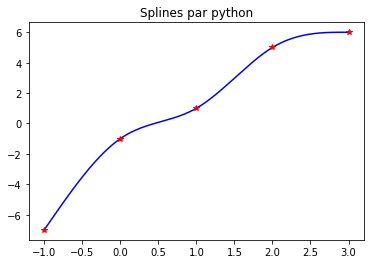

In [14]:
X0_graph=np.linspace(X[0], X[1], 10001)
X1_graph=np.linspace(X[1], X[2], 10001)
X2_graph=np.linspace(X[2], X[3], 10001)
X3_graph=np.linspace(X[3], X[4], 10001)
Xtot_graph=np.linspace(X[0], X[4], 10001)

plt.plot(Xtot_graph, cs(Xtot_graph), 'b')
plt.plot(X, Y, 'r*')
plt.title('Splines par python')

**Question 3** Vérifier graphiquement que les dérivées secondes aux points extrémaux $x_0$ et $x_n$ sont bien nulles.


**Correction**:

Text(0.5,1,u'Spline et ses derivees par fonction python')

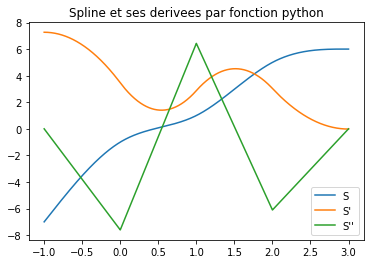

In [15]:
plt.plot(Xtot_graph, cs(Xtot_graph), label="S")
plt.plot(Xtot_graph, cs(Xtot_graph, 1), label="S'")
plt.plot(Xtot_graph, cs(Xtot_graph, 2), label="S''")
plt.legend(loc="best")
plt.title('Spline et ses derivees par fonction python')

**Question 4** Calculer le polynôme interpolateur de Lagrange passant par les $(x_i, y_i)$. Comparer les deux courbes d'interpolation.

**Correction**:

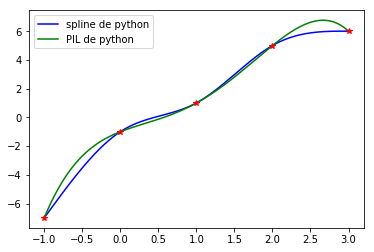

In [16]:
x=np.linspace(-1.,3.,10001)
y=inter.barycentric_interpolate(X, Y, x)
plt.plot(Xtot_graph, cs(Xtot_graph), 'b', label='spline de python')
plt.plot(x, y, 'g', label='PIL de python')
plt.plot(X, Y, 'r*')
plt.legend(loc="best")

### Exercice 6 : Expression de la spline cubique naturelle  
Le but de cet exercice est de déterminer une expression de chaque polynôme $S_i$ pour $i\in\{0, n-1\}$.  
**Question 1:** Pour $i\in\{0, .., n\}$, on note $\sigma_i=S_i''(x_i)$ en imposant $\sigma_0=\sigma_n=0$. Montrer que sur chaque sous intervalle $[x_i, x_{i+1}]$ avec $i\in\{0, n-1\}$, on a 
$$S_i''(x)=\sigma_{i+1}\frac{x-x_i}{x_{i+1}-x_i}+\sigma_i\frac{x_{i+1}-x}{x_{i+1}-x_i}.$$


**Correction**:

 Nous rappelons que pour tout $i \in\{1,n-2\}, 
S''_i(x_{i+1})=S''_{i+1}(x_{i+1})$.
  
$S_i''$ est l'unique polynôme de degré $1$ tel que 
$S_i''(x_{i})=\sigma_i$ et $S_i''(x_{i+1})=S_{i+1}''(x_{i+1})=\sigma_{i+1}$
ce qui est le cas du polynôme suivant:
$$S_i''(x)=\sigma_{i+1}\frac{x-x_i}{x_{i+1}-x_i}+\sigma_i\frac{x_{i+1}-x}{x_{i+1}-x_i}.$$

**Question 2:** En intégrant et évaluant en $y_i$ et $y_{i+1}$, en déduire les expressions de $S'_i$ et de $S_i$ en fonction des $\sigma_i$ pour $i\in\{0, n-1\}$.


**Correction**:

En intégrant une première fois, on obtient
$$S_i'(x)=\sigma_{i+1}\frac{(x-x_i)^2}{2(x_{i+1}-x_i)}-\sigma_i\frac{(x_{i+1}-x)^2}{2(x_{i+1}-x_i)}+C_{i,1}$$
Puis en intégrant une seconde fois, on obtient
$$S_i(x)=\sigma_{i+1}\frac{(x-x_i)^3}{6(x_{i+1}-x_i)}+\sigma_i\frac{(x_{i+1}-x)^3}{6(x_{i+1}-x_i)}+C_{i,1}x+C_{i,2}$$
ou encore
$$S_i(x)=\sigma_{i+1}\frac{(x-x_i)^3}{6(x_{i+1}-x_i)}+\sigma_i\frac{(x_{i+1}-x)^3}{6(x_{i+1}-x_i)}+a_i\frac{x-x_i}{x_{i+1}-x_i}+b_i\frac{x_{i+1}-x}{x_{i+1}-x_i}$$
En évaluant en $x_i$ et $x_{i+1}$, on a
$$a_i=y_{i+1}-\sigma_{i+1}\frac{(x_{i+1}-x_i)^2}{6}$$
et 
$$b_i=y_{i}-\sigma_{i}\frac{(x_{i+1}-x_i)^2}{6}.$$
Donc
$$\begin{array}{rcl}
S_i(x)&=&\sigma_{i+1}\frac{(x-x_i)^3}{6(x_{i+1}-x_i)}+\sigma_{i+1}\frac{(x_{i+1}-x)^3}{6(x_{i+1}-x_i)}+\left[y_{i+1}-\sigma_{i+1}\frac{(x_{i+1}-x_i)^2}{6}\right]\frac{x-x_i}{x_{i+1}-x_i}\\
&&+\left[y_{i}-\sigma_{i}\frac{(x_{i+1}-x_i)^2}{6}\right]\frac{x_{i+1}-x}{x_{i+1}-x_i}\end{array}$$

**Question 3:** Ecrire l'expression de $S'_i(x_i)$ et de $S'_{i-1}(x_i)$. En déduire un système linéaire sur les $\sigma_i$ de la forme $A\mathfrak{S}=b$ avec $\mathfrak{S}=(\sigma_1, \sigma_2, ..., \sigma_{n-1})^T\in\mathbb{R}^{n-1}$, $A\in\mathcal{M}_{n-1}(\mathbb{R})$ et $b\in\mathbb{R}^{n-1}.$ Que valent $A$ et $b$ ?



**Correction**:

On a, pour $i\in\{0,...,n-1\}$

$$
\begin{array}{rcl}
S_i'(x)&=&\sigma_{i+1}\frac{(x-x_i)^2}{2(x_{i+1}-x_i)}-\sigma_i\frac{(x_{i+1}-x)^2}{2(x_{i+1}-x_i)}+\left[y_{i+1}-\sigma_{i+1}\frac{(x_{i+1}-x_i)^2}{6}\right]\frac{1}{x_{i+1}-x_i}\\
&&+\left[y_{i}-\sigma_{i}\frac{(x_{i+1}-x_i)^2}{6}\right]\frac{-1}{x_{i+1}-x_i}
\end{array}
$$


On évalue une première fois en $x_i$, pour $i\in\{0,...,n-1\}$
$$
\begin{array}{rcl}
S_i'(x_i)&=&-\sigma_i\frac{(x_{i+1}-x_i)}{2}+\left[y_{i+1}-\sigma_{i+1}\frac{(x_{i+1}-x_i)^2}{6}\right]\frac{1}{x_{i+1}-x_i}+\left[y_{i}-\sigma_{i}\frac{(x_{i+1}-x_i)^2}{6}\right]\frac{-1}{x_{i+1}-x_i}\\
&=&-\sigma_{i+1}\frac{(x_{i+1}-x_i)}{6}-\sigma_i\frac{(x_{i+1}-x_i)}{3}+\frac{y_{i+1}-y_i}{x_{i+1}-x_i}.
\end{array}
$$
On évalue ensuite en $x_{i+1}$ pour $i\in\{0,...,n-1\}$
$$
\begin{array}{rcl}
S_i'(x_{i+1})&=&\sigma_{i+1}\frac{(x_{i+1}-x_i)}{2}+\left[y_{i+1}-\sigma_{i+1}\frac{(x_{i+1}-x_i)^2}{6}\right]\frac{1}{x_{i+1}-x_i}+\left[y_{i}-\sigma_{i}\frac{(x_{i+1}-x_i)^2}{6}\right]\frac{-1}{x_{i+1}-x_i}\\
&=&\sigma_{i+1}\frac{(x_{i+1}-x_i)}{3}+\sigma_{i}\frac{(x_{i+1}-x_i)}{6}+\frac{y_{i+1}-y_i}{x_{i+1}-x_i}\\
\end{array}
$$
D'où, en posant $j=i+1$, on a pour tout $j\in\{1,...,n\}$ :
$$
\begin{array}{rcl}
S_{j-1}'(x_{j})&=&\sigma_{j}\frac{(x_{j}-x_{j-1})}{3}+\sigma_{j-1}\frac{(x_{j}-x_{j-1})}{6}+\frac{y_{j}-y_{j-1}}{x_{j}-x_{j-1}}\\
\end{array}
$$
Par la suite nous utiliserons cette égalité en remplaçant $j$ par $i$.


Or pour tout $i\in\{1,...,n-1\}$, on a $S'_{i}(x_{i})=S'_{i-1}(x_{i})$. D'où le système d'équations suivantes :
$$
\begin{array}{rcl}
-\sigma_{i+1}\frac{(x_{i+1}-x_i)}{6}-\sigma_i\frac{(x_{i+1}-x_i)}{3}+\frac{y_{i+1}-y_i}{x_{i+1}-x_i}&=&\sigma_{i}\frac{(x_{i}-x_{i-1})}{3}+\sigma_{i-1}\frac{(x_{i}-x_{i-1})}{6}+\frac{y_{i}-y_{i-1}}{x_{i}-x_{i-1}}
\end{array}
$$

Nous obtenons donc, pour tout $i\in\{1,...,n-1\}$,
$$
\begin{array}{rcl}
    \sigma_{i+1}\frac{(x_{i+1}-x_i)}{(x_{i+1}-x_i)+(x_{i}-x_{i-1})}+2\sigma_i+\sigma_{i-1}\frac{(x_{i}-x_{i-1})}{(x_{i+1}-x_i)+(x_{i}-x_{i-1})}&=&\frac{6}{(x_{i+1}-x_i)+(x_{i}-x_{i-1})}\left[\frac{(y_{i+1}-y_i)}{(x_{i+1}-x_i)}-\frac{(y_{i}-y_{i-1})}{x_{i}-x_{i-1}}\right].
\end{array}
$$

Cette dernière équation se réécrit sous forme matricielle :
\begin{equation*}
\begin{pmatrix}
2&\lambda_1&&&0\\
\mu_2&2&\lambda_2&&\\
&\ddots&\ddots&\ddots&\\
&&\mu_{n-2}&2&\lambda_{n-2}\\
0&&&\mu_{n-1}&2\\
\end{pmatrix}
\begin{pmatrix}
\sigma_1\\
\sigma_2\\
\vdots\\
\sigma_{n-2}\\
\sigma_{n-1}
\end{pmatrix}=
\begin{pmatrix}
f_1\\
f_2\\
\vdots\\
f_{n-2}\\
f_{n-1}
\end{pmatrix}
\end{equation*}
avec 
\begin{equation*}
\left\{
\begin{split}
&\lambda_i=\frac{(x_{i+1}-x_i)}{(x_{i+1}-x_i)+(x_{i}-x_{i-1})},\\
&\mu_i=\frac{(x_{i}-x_{i-1})}{(x_{i+1}-x_i)+(x_{i}-x_{i-1})}=1-\lambda_i,\\
&f_i=\frac{6}{(x_{i+1}-x_i)+(x_{i}-x_{i-1})}\left[\frac{(y_{i+1}-y_i)}{(x_{i+1}-x_i)}-\frac{(y_{i}-y_{i-1})}{x_{i}-x_{i-1}}\right]
\end{split}
\right.
\end{equation*}


On obtient $n-1$ équations avec $n-1$ inconnues $\sigma_1$,... ,$\sigma_{n-1}$ 
puisque $\sigma_0=\sigma_n=0$. 



**Question 4 (Implémentation Python):** Pour les points $(x_i, y_i)$ de l'exercice 5, assembler en python la matrice $A$ et le vecteur $b$. 


**Correction**:

In [17]:
X=np.array([-1, 0, 1, 2, 3.])
Y=np.array([-7., -1, 1, 5, 6])
#A=np.array([[2.*(X[2]-X[0]), X[2]-X[1], 0], [X[2]-X[1], 2*(X[3]-X[1]), X[3]-X[2]], [0, X[3]-X[2], 2*(X[4]-X[2])]])
A=np.array([[2, (X[2]-X[1])/(X[2]-X[0]), 0], [1-(X[3]-X[2])/(X[3]-X[1]), 2, (X[3]-X[2])/(X[3]-X[1])], [0, 1-(X[4]-X[3])/(X[4]-X[2]), 2]])
#b=np.array([6*(Y[2]-Y[1])/(X[2]-X[1])-6*(Y[1]-Y[0])/(X[1]-X[0]), 6*(Y[3]-Y[2])/(X[3]-X[2])-6*(Y[2]-Y[1])/(X[2]-X[1]), 6*(Y[4]-Y[3])/(X[4]-X[3])-6*(Y[3]-Y[2])/(X[3]-X[2])])
b=np.array([6*(Y[2]-Y[1])/((X[2]-X[1])*(X[2]-X[0]))-6*(Y[1]-Y[0])/((X[1]-X[0])*(X[2]-X[0])),6*(Y[3]-Y[2])/((X[3]-X[2])*(X[3]-X[1]))-6*(Y[2]-Y[1])/((X[2]-X[1])*(X[3]-X[1])),6*(Y[4]-Y[3])/((X[4]-X[3])*(X[4]-X[2]))-6*(Y[3]-Y[2])/((X[3]-X[2])*(X[4]-X[2]))])


**Question 5 (Implémentation Python):** Résoudre le système linéaire $A\mathfrak{S}=b$ au moyen d'une méthode numérique de votre choix vue en cours (on évitera d'utiliser ```np.linalg.solve```).


**Correction**:

In [18]:
sigma_pas_extremite=np.linalg.solve(A, b) # on aurait pu utiliser les méthodes itératives (Jacobi, Gauss-Seidel, SOR) ou la méthode directe LU
sigma=np.zeros(5)
sigma[1:4]=sigma_pas_extremite

**Question 6 (Implémentation Python):** Définir des fonctions qui calculent les polynômes $S_i$ sur chaque intervalle $[x_i, x_{i+1}]$.


**Correction**:

In [19]:
def S0vrai(x):
    i=0
    a=sigma[i+1]*(x-X[i])**3/(6.*(X[i+1]-X[i]))+Y[i+1]*(x-X[i])/(X[i+1]-X[i])-sigma[i+1]*(X[i+1]-X[i])*(x-X[i])/6+Y[i]*(X[i+1]-x)/(X[i+1]-X[i])
    return a

def S1vrai(x):
    i=1
    a=sigma[i+1]*(x-X[i])**3/(6.*(X[i+1]-X[i]))+sigma[i]*(X[i+1]-x)**3/(6.*(X[i+1]-X[i]))+Y[i+1]*(x-X[i])/(X[i+1]-X[i])-sigma[i+1]*(X[i+1]-X[i])*(x-X[i])/6+Y[i]*(X[i+1]-x)/(X[i+1]-X[i])-sigma[i]*(X[i+1]-X[i])*(X[i+1]-x)/6
    return a

def S2vrai(x):
    i=2
    a=sigma[i+1]*(x-X[i])**3/(6.*(X[i+1]-X[i]))+sigma[i]*(X[i+1]-x)**3/(6.*(X[i+1]-X[i]))+Y[i+1]*(x-X[i])/(X[i+1]-X[i])-sigma[i+1]*(X[i+1]-X[i])*(x-X[i])/6+Y[i]*(X[i+1]-x)/(X[i+1]-X[i])-sigma[i]*(X[i+1]-X[i])*(X[i+1]-x)/6
    return a

def S3vrai(x):
    i=3
    a=sigma[i]*(X[i+1]-x)**3/(6.*(X[i+1]-X[i]))+Y[i+1]*(x-X[i])/(X[i+1]-X[i])+Y[i]*(X[i+1]-x)/(X[i+1]-X[i])-sigma[i]*(X[i+1]-X[i])*(X[i+1]-x)/6
    return a


**Question 7 (Implémentation Python):** Tracer la spline cubique ainsi obtenue. La comparer avec celle obtenue à l'exercice 5.


**Correction**:

Text(0.5,1,u'Splines par python et par moi')

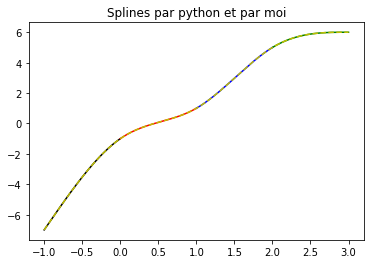

In [20]:
cs = inter.CubicSpline(X, Y, bc_type='natural')
plt.plot(X0_graph, S0vrai(X0_graph), color='k')
plt.plot(X1_graph, S1vrai(X1_graph), color='r')
plt.plot(X2_graph, S2vrai(X2_graph), color='b')
plt.plot(X3_graph, S3vrai(X3_graph), color='g')
plt.plot(Xtot_graph, cs(Xtot_graph), 'y--')
plt.title('Splines par python et par moi')

## Courbes de Bézier  
### Exercice 7: Compréhension des courbes de Bézier  
Soient $P_0=(\alpha_0, \beta_0), P_1=(\alpha_1, \beta_1), ..., P_{m}=(\alpha_m, \beta_m)$ $m+1$ points distincts du plan. Nous rappelons que la courbe de Bézier associée à ces points est la courbe paramétrée définie de la manière suivante : 
\begin{equation*}
\forall t\in[0,1], \left\{
\begin{split}
&x(t)=\sum_{k=0}^{m}B_k(t)\alpha_k,\\
&y(t)=\sum_{k=0}^{m}B_k(t)\beta_k.
\end{split}
\right.
\end{equation*}
Dans ce qui précède, les $B_k(t)$ sont les polynômes de Bernstein d'ordre $m$ définis par  
$$B_k(X)=\binom{m}{k}X^k(1-X)^{m-k}, \forall k\in\{0, ..., m\}.$$
Cette courbe a la propriété de passer par les points $P_0$ et $P_m$ et d'être tangente à $\overrightarrow{P_0P_1}$ en $P_0$ et à $\overrightarrow{P_{m-1}P_m}$ en $P_m$. Attention, la courbe ne passe pas par les autres points $P_i$ pour $i\in\{1, ..., m-1\}.$ Ils servent plutôt à contrôler la courbure de la courbe.


**Question 1:** Ecrire les 4 polynômes de Bernstein d'ordre 3 ($m=3$).


**Correction**:

$B_0(X)=\begin{pmatrix}3\\0\end{pmatrix}X^0(1-X)^{3-0}=(1-X)^3$  
$B_1(X)=\begin{pmatrix}3\\1\end{pmatrix}X^1(1-X)^{3-1}=3X(1-X)^2$  
$B_2(X)=\begin{pmatrix}3\\2\end{pmatrix}X^2(1-X)^{3-2}=3X^2(1-X)$  
$B_3(X)=\begin{pmatrix}3\\3\end{pmatrix}X^3(1-X)^{3-3}=X^3$ 

**Question 2:** Ecrire l'expression de la courbe paramétrée de Bézier dans ce cas.


**Correction**:

$$\left\{\begin{array}{l}
x(t)=(1-t)^3\alpha_0+3t(1-t)^2\alpha_1+3t^2(1-t)\alpha_2+t^3\alpha_3\\
y(t)=(1-t)^3\beta_0+3t(1-t)^2\beta_1+3t^2(1-t)\beta_2+t^3\beta_3
\end{array}\right.$$

**Question 3:** Que vaut cette courbe dans le cas particulier : $\{(x_i, y_i)\}=\{(-1, -7), (0, -1), (1, 1), (2, 5)\}$ ?


**Correction**:

$$\left\{\begin{array}{l}
x(t)=-(1-t)^3+3t(1-t)^2+3t^2(1-t)+2t^3\\
y(t)=-7(1-t)^3-3t(1-t)^2+3t^2(1-t)+5t^3
\end{array}\right.$$

**Remarque :** Dans la pratique, on se restreint souvent au cas des courbes de Bézier de degré 3 ($m=3$) car ce sont des courbes d'une grande régularité qui permettent d'approcher un certain nombre de cas non triviaux (points d'inflexion, points de rebroussement, points double), ce que ne permet pas de faire le degré 2.

**Exercice 8 (Implémentation Python): Visualisation d'une courbe de Bézier**  
Soient les points $\{(\alpha_k, \beta_k)\}=\{(0, 0), (0, 1), (1, 1), (1,0)\}$. On veut tracer la courbe de Bézier associée à ces points. Elle devra passer par les deux points extremaux $(0, 0)$ et $(1,0)$ tandis que sa courbure sera définie par les points $(0, 1)$ et $(1, 1)$.


**Question 1:**  Tracer ces points dans un plan.

**Correction**:

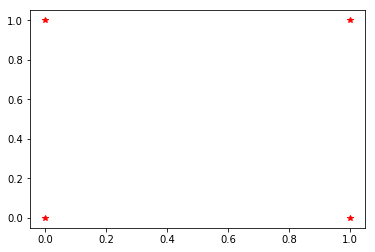

In [21]:
X_essai=np.array([0, 0.5, 0.5, 1.])
X=np.array([0, 0, 1, 1.])
Y=np.array([0, 1, 1., 0.])
plt.plot(X, Y, 'r*')

**Question 2:** Que vaut la courbe de Bezier associée à ces points ? Tracer-la sur la même figure. On pensera à mettre des couleurs, un titre et une légende au graphique.

**Correction**:

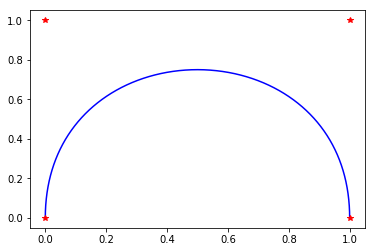

In [22]:
def courbe_bezier(t):
    x=(1-t)**3*X[0]+3*t*(1-t)**2*X[1]+3*t**2*(1-t)*X[2]+t**3*X[3]
    y=(1-t)**3*Y[0]+3*t*(1-t)**2*Y[1]+3*t**2*(1-t)*Y[2]+t**3*Y[3]
    return x, y

t=np.linspace(0,1,10001)
x,y=courbe_bezier(t)
plt.plot(x, y, 'b')
plt.plot(X, Y, 'r*')

**Question 3:** Vérifier graphiquement que la courbe passe bien par $P_0$ et $P_3$ et qu'elle est bien tangente aux vecteurs $\overrightarrow{P_0P_1}$ et $\overrightarrow{P_2P_3}$.

**Correction**:

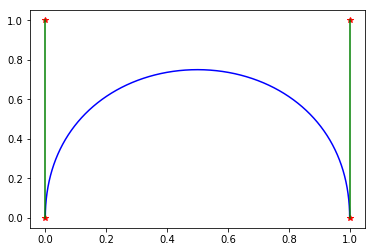

In [23]:
plt.plot(x, y, 'b')
plt.plot(X, Y, 'r*')
plt.plot([X[0], X[1]], [Y[0], Y[1]], 'g')
plt.plot([X[2], X[3]], [Y[2], Y[3]], 'g') 


**Question 4:** On souhaite modifier légèrement l'allure de la courbe entre les points $(\alpha_1, \beta_1)$ et $(\alpha_2, \beta_2)$. Comment peut-on procéder ?

**Correction**:

Il suffit de rajouter des points de contrôle : la courbure de la courbe en sera modifiée mais on n'imposera pas pour autant à la courbe de passer par ces points supplémentaires.